In [1]:
import pandas as pd
 
# Load the CSV (adjust the path if needed)
df = pd.read_csv('fraud_jobs_train.csv')
 
# Show first 5 rows
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,7531,Contact Center Representatives,"US, VA, Virginia Beach",NaN,NaN,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",The position requires the following qualificat...,Our company offers a competitive salary plus B...,0,1,0,Full-time,Entry level,Unspecified,Financial Services,Customer Service,0
1,130,Customer Service Associate,"US, TX, Dallas",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 1 year customer servi...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
2,4641,Automated Test Analyst,"NZ, , Auckland",Permanent,NaN,SilverStripe CMS &amp; Framework is an open so...,We are looking for a dedicated and passionate ...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Information Technology and Services,NaN,0
3,403,Inside Sales Professional-Omaha,"US, NE, Omaha",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0
4,13219,Content Marketing/SEO Manager,"US, CA, Los Angeles",Marketing,NaN,MeUndies is a lifestyle brand that is transfor...,MeUndies is a lifestyle brand that is transfor...,REQUIREMENTS/QUALIFICATIONS/PERSONAL ATTRIBUTE...,"WHY MEUNDIES?We're a fast-growing, VC-backed c...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Marketing,0


In [2]:
df.isnull().sum()

job_id                     0
title                      0
location                 280
department              9275
salary_range           12021
company_profile         2672
description                1
requirements            2132
benefits                5803
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         2757
required_experience     5675
required_education      6499
industry                3926
function                5169
fraudulent                 0
dtype: int64

In [3]:
df = df.dropna(subset=['description'])

In [4]:
text_columns = ['company_profile', 'benefits', 'requirements']
 
for col in text_columns:
    df[col] = df[col].fillna('')

In [5]:
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

In [6]:
df['text'].iloc[0]

'Contact Center Representatives Tidewater Finance Co. was established in 1992 for the initial purpose of purchasing, and servicing retail installment contracts. There are two divisions: Tidewater Credit Services, providing indirect consumer retail finance options and Tidewater Motor Credit, providing indirect consumer auto financing. We remain committed to offering a partnership with the dealers and consumers to create a WIN-WIN-WIN situation. Our success relies solely on the success of our dealers and our consumers.Full time positions include the following benefits:40 vacation hours after 6 months of employment, 80 vacation hours after 1 year of employment6 paid holidays as well as an anniversary holiday benefitPaid personal and sick leave after 90 days of employmentFull benefits to include health, dental, life and disability insuranceA 401k plan with a company match after 6 months of employment based upon a quarterly entry dateIncentive bonuses for individual and team goals (certain 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Create the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
 
# Transform the text column into numbers
X = vectorizer.fit_transform(df['text'])

In [8]:
y = df['fraudulent']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Fraud probability
 
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

F1 Score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2723
           1       0.95      0.51      0.67       138

    accuracy                           0.98      2861
   macro avg       0.96      0.76      0.83      2861
weighted avg       0.97      0.98      0.97      2861


Confusion Matrix:
 [[2719    4]
 [  67   71]]


In [13]:
import pandas as pd
 
# Convert X_test (sparse) to DataFrame
X_test_dense = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())
 
# Add predictions and probabilities
X_test_dense["predicted_label"] = y_pred
X_test_dense["fraud_probability"] = y_proba
 
# Save to CSV
X_test_dense.to_csv("predictions.csv", index=False)
 
X_test_dense.head()

,00,000,00am,00pm,0in,0pt,10,100,1000,100k,...,στο,τα,την,της,τις,το,του,των,predicted_label,fraud_probability
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.89
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.03
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.04
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.01


In [14]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}
 
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)
 
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [15]:
y_pred = best_model.predict(X_test)
f1_score(y_test, y_pred)

0.7117117117117117

In [16]:
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

F1 Score: 0.7117117117117117

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2723
           1       0.94      0.57      0.71       138

    accuracy                           0.98      2861
   macro avg       0.96      0.79      0.85      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix:
 [[2718    5]
 [  59   79]]


In [17]:
# Save the indices of the original dataframe
original_indices = df.index

In [18]:
from sklearn.model_selection import train_test_split
 
# Split X and y as usual, but also split original indices
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, original_indices, test_size=0.2, stratify=y, random_state=42
)

In [19]:
final_df = pd.DataFrame()
final_df["Job_Title"] = df.loc[idx_test, "title"].values
final_df["Company"] = df.loc[idx_test, "company_profile"].values
final_df["Description"] = df.loc[idx_test, "description"].values
final_df["Fraud_Probability"] = y_proba
final_df["Predicted_Label"] = y_pred

In [20]:
final_df.head()

,Job_Title,Company,Description,Fraud_Probability,Predicted_Label
0,Call Center Representative,,Duties and Responsibilities:Answer Call Center...,0.89,1
1,Customer Support Advocate,ServiceTitan is the world's leading CRM softwa...,About ServiceTitanServiceTitan is the world's ...,0.03,0
2,Account Manager (Fashion),"EVH is a fashion, lifestyle, design and luxury...","Australia’s fastest growing Fashion, Luxury an...",0.01,0
3,Web Developer,,"Due to continued growth , we require a Front E...",0.04,0
4,Client Accounts Specialist,Who are We?Aya Healthcare is a top healthcare ...,Join one of San Diego's 2014 Top Workplaces na...,0.01,0


In [21]:
final_df.to_csv("job_fraud_predictions.csv", index=False)

In [22]:
!pip install wordcloud

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

C:\Users\u120850\AppData\Local\Temp\ipykernel_11448\3668338186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x="Predicted_Label", palette=["green", "red"])


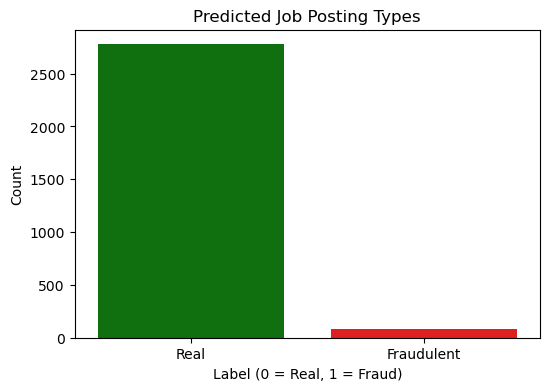

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=final_df, x="Predicted_Label", palette=["green", "red"])
plt.title("Predicted Job Posting Types")
plt.xlabel("Label (0 = Real, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Real", "Fraudulent"])
plt.show()

<Axes: xlabel='Predicted_Label', ylabel='count'>

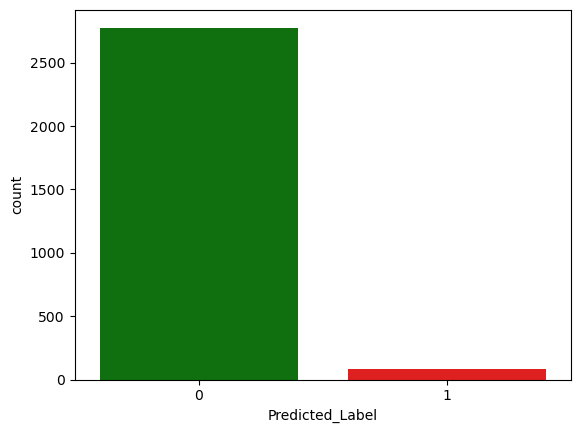

In [25]:
sns.countplot(data=final_df, x="Predicted_Label", hue="Predicted_Label", palette=["green", "red"], legend=False)

C:\Users\u120850\AppData\Local\Temp\ipykernel_11448\1746572860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fraud_Probability", y="Job_Title", data=top_frauds, palette="Reds_r")


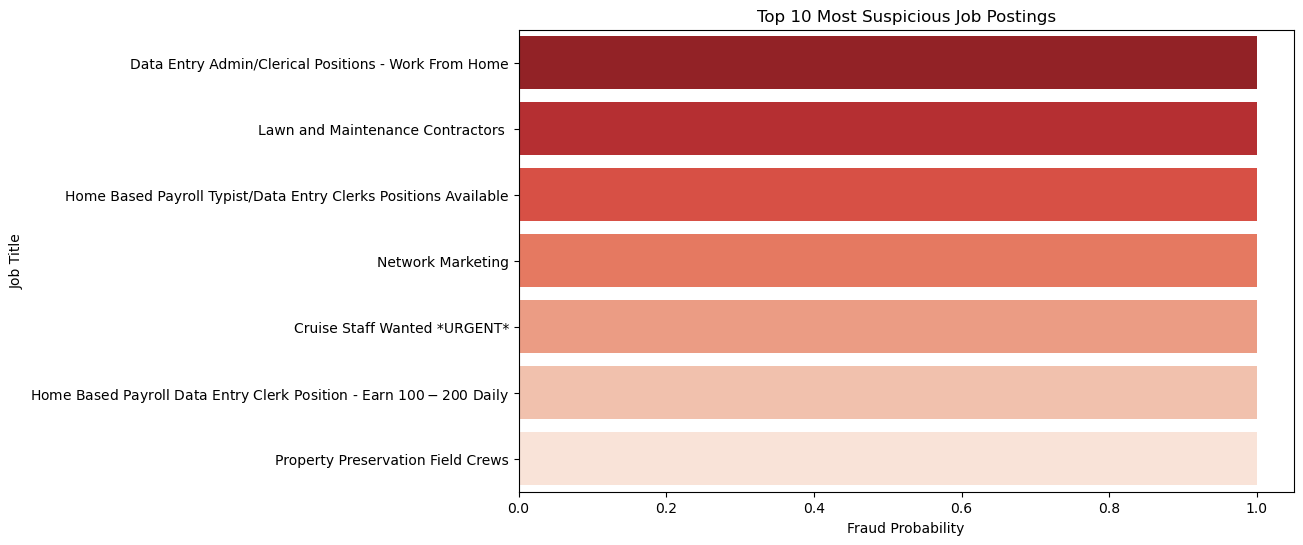

In [26]:
top_frauds = final_df.sort_values(by="Fraud_Probability", ascending=False).head(10)
 
plt.figure(figsize=(10, 6))
sns.barplot(x="Fraud_Probability", y="Job_Title", data=top_frauds, palette="Reds_r")
plt.title("Top 10 Most Suspicious Job Postings")
plt.xlabel("Fraud Probability")
plt.ylabel("Job Title")
plt.show()

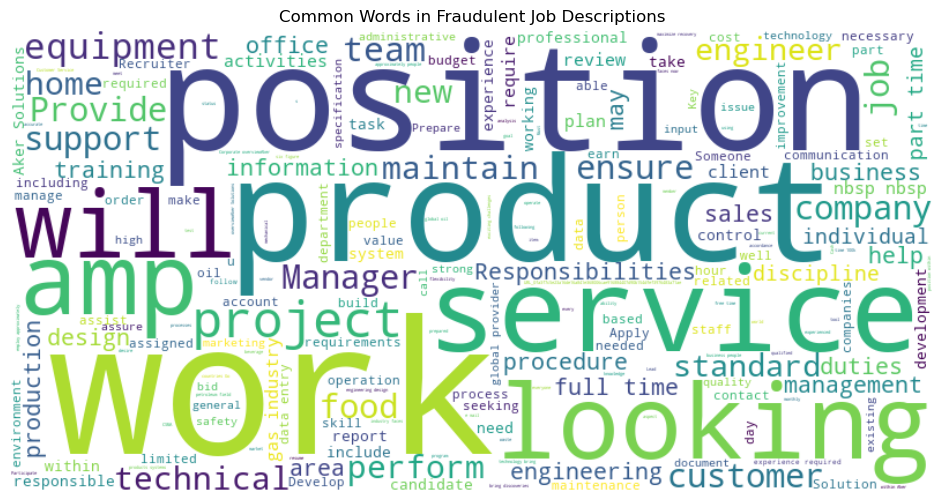

In [27]:
# Filter fraudulent jobs
fraud_jobs = final_df[final_df["Predicted_Label"] == 1]
 
# Join all descriptions into one big string
text = " ".join(fraud_jobs["Description"].dropna().astype(str).values)
 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
 
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Fraudulent Job Descriptions")
plt.show()

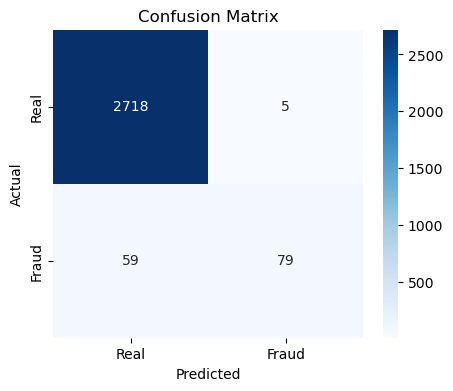

In [28]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
 
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Real", "Fraud"], yticklabels=["Real", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
import joblib
 
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']